<a href="https://colab.research.google.com/github/sherylsqin/CE888/blob/master/Assignment2/Assignment_2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt #plotting charts
import pandas as pd #helps importing datasets
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from math import *
import random
import io
import os

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


__QUESTION 2__

As from out previous dataset generated from assignment 1 a function decision_tree_classifier() function implemented to train 
the decision tree and return the classifier. 

The input data set is split into 60 for train set and 40 percent for test set. A graph is plotted between accuracy and depth of the tree for 50 iterations. The highest accuracy from the depth of the tree will used to train the DT classifier 

In [0]:
def decision_tree_classifier(input_dat, get_depth, depth_max):
    #Split data into 60-40 percent for training and testing
    #print(len(input_dat))
    train_set, test_set = train_test_split(input_dat, test_size = 0.4, random_state = 55)
    
    #Select from column 1-9 for training set (oxo board position)
    train_x = train_set.iloc[:,0:9]
    #Select column best move of each stage for training set
    train_y = train_set.iloc[:,-1]
    train_y = train_y.astype('int')
    
    #Select from column 1-9 for test set (oxo board position)
    test_x = test_set.iloc[:,0:9]
    #Select column best move of each stage for test set
    test_y = test_set.iloc[:,-1]
    test_y = test_y.astype('int')
    
    #Plotting data accuracy vs tree's depth from 0 to 49
    if(get_depth == 1):
        #print("in if get_depth==1 : ", get_depth)
        depth_range = list(range(1,50))
        accuracy_list = []
        for depth in depth_range:
            dt_classifier_1 = DecisionTreeClassifier(criterion='gini',max_depth=depth,random_state=55)
            dt_classifier_1.fit(train_x, train_y)
            score = dt_classifier_1.score(test_x, test_y)
            accuracy_list.append(score)
        plt.plot(depth_range,accuracy_list, label = 'Accuracy')
        plt.legend(framealpha = 1, frameon = True)
        plt.xlabel('Tree Depth')
        plt.ylabel('Accuracy')
        plt.show()  
        #Select the maximum accuracy with the first run and train the classifier again on the same depth
        depth_max = (accuracy_list.index(max(accuracy_list)) + 1)
        print("Maximum accuracy : ", max(accuracy_list))
        print("Maximum depth of decision tree is : ", depth_max)
    
    #Train the classifier with the maximum accuracy in every iterations
    dt_classifier = DecisionTreeClassifier(criterion='gini',max_depth=depth_max,random_state=55)
    dt_classifier.fit(train_x, train_y)
    pred_test_y = dt_classifier.predict(test_x)
    
    #Print confusion matrix in order to see the precision/recall/accuracy
    print(classification_report(test_y,pred_test_y)) 
    
    #Export decision tree graphic
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('decision_tree.png')
    Image(graph.create_png())

    return dt_classifier, depth_max

__QUESTION 4__

This function is made to satisfy the flip coin condition.

def GetRandomMove(state, clf):
    
Random method uniform, so we can set up the lowerbound and upperbound in order to match with Question 4 where we need to do 90% with best move by DT and 10% by random

In [0]:
class OXOState:
    """ A state of the game, i.e. the game board.
        Squares in the board are in this arrangement
        012
        345
        678
        where 0 = empty, 1 = player 1 (X), 2 = player 2 (O)
    """
    def __init__(self):
        self.playerJustMoved = 2 
        # At the root pretend the player just moved is 2 whereas player 1 has the first move.
        self.board = [0,0,0,0,0,0,0,0,0] 
        # 0 = empty, 1 = player 1, 2 = player 2. This is the initial board state - all positions are empty.
        
    def Clone(self):
        """ Create a deep clone of this game state.
        """
        st = OXOState()
        st.playerJustMoved = self.playerJustMoved
        st.board = self.board[:]
        return st

    def DoMove(self, move):
        """ Update the state board by replacing 0 with the player playing the move at the position/move of the board.
            Must update playerJustMoved.
        """
        assert move >= 0 and move <= 8 and move == int(move) and self.board[move] == 0
        self.playerJustMoved = 3 - self.playerJustMoved
        self.board[move] = self.playerJustMoved
        
    def GetMoves(self):
        """ Get all possible moves from this state. That is return all the positional values of the zroes in the state board.
        """
        return [i for i in range(9) if self.board[i] == 0]
    
    def GetResult(self, playerjm):
        """ Get the game result from the viewpoint of playerjm. 
        """
        for (x,y,z) in [(0,1,2),(3,4,5),(6,7,8),(0,3,6),(1,4,7),(2,5,8),(0,4,8),(2,4,6)]:
            #Winning possibilities of the board
            if self.board[x] == self.board[y] == self.board[z]: 
                # check if values in all the 3 positions is of the same player
                # check if the player that just moved is same as the value in the winning positions, 
                #if yes return 1 else 0 stating that the other player wins.
                if self.board[x] == playerjm: 
                    return 1.0
                else:
                    return 0.0
        if self.GetMoves() == []:
            return 0.5 # draw
        return False # Should not be possible to get here

    def __repr__(self): # This is how the return value is defined for this class.
        s= ""
        for i in range(9): 
            s += ".XO"[self.board[i]] # . for 0, X for 1 and O for 2 positional values
            if i % 3 == 2: s += "\n"
        return s

class Node:
    """ A node in the game tree. Note : wins is always from the viewpoint of playerJustMoved.
        Crashes if state not specified.
    """
    def __init__(self, move = None, parent = None, state = None):
        self.move = move # the move that got us to this node - "None" for the root node
        #parentNode stores all the parents from the rootnode until the current 
        #node for backpropogation, during which it deletes until it is None.
        self.parentNode = parent # "None" for the root node.
        self.childNodes = []
        self.wins = 0
        self.visits = 0 #The number of itermax passed
        self.untriedMoves = state.GetMoves() 
        # future child nodes. The available positions to be played at any point of the game.
        self.playerJustMoved = state.playerJustMoved 
        # the only part of the state that the Node needs later
        
    def UCTSelectChild(self):
        """ Use the UCB1 formula to select a child node. Often a constant UCTK is applied so we have
            lambda c: c.wins/c.visits + UCTK * sqrt(2*log(self.visits)/c.visits to vary the amount of
            exploration versus exploitation.
        """
        s = sorted(self.childNodes, key = lambda c: c.wins/c.visits + sqrt(2*log(self.visits)/c.visits))[-1] 
        #pick the highest
        return s
    
    def AddChild(self, m, s):
        """ Remove m from untriedMoves and add a new child node for this move.
            Return the added child node.
        """
        n = Node(move = m, parent = self, state = s)
        self.untriedMoves.remove(m)
        self.childNodes.append(n)
        return n
    
    def Update(self, result):
        """ Update this node - one additional visit and result additional wins. result must be 
        from the viewpoint of playerJustmoved.
        """
        self.visits += 1
        self.wins += result

    def __repr__(self): # Added other variables to be returned to check the flow 
        #of the variable during testing small iterations.
        return "[M:" + str(self.move) + " W/V:" + str(self.wins) + "/" + str(self.visits) + " U:" + str(self.untriedMoves) + " PJM:" + str(self.playerJustMoved) + "]"

    def TreeToString(self, indent):
        s = self.IndentString(indent) + str(self)
        for c in self.childNodes:
             s += c.TreeToString(indent+1)
        return s

    def IndentString(self,indent):
        s = "\n"
        for i in range (1,indent+1):
            s += "| "
        return s

    def ChildrenToString(self):
        s = ""
        for c in self.childNodes:
             s += str(c) + "\n"
        return s

def GetRandomMove(state, clf):
    
    #Random method uniform, so we can set up the lowerbound and upperbound in order
    #to match with Question 4 where we need to do 90% with best move by DT and 10% by random
    rng_num = random.uniform(0.0, 1.0)

    if rng_num <= 0.9:
        next_move=clf.predict([state.board])
        next_move=next_move[0]
    
        #If moved decided by DT is not in untried moves, we will generate next move randomly
        if next_move not in state.GetMoves():
            next_move=random.choice(state.GetMoves())
            #Update the move position to global variable 'record_state'.
            #A combined stage where we used this data to traind for the next train
            
            state_board=list(state.board) #Store the position state 
            state_board.append(next_move) 
            record_state.append(state_board) #update to record_state       
    else:
        next_move=random.choice(state.GetMoves())
    return next_move
    
def UCT(initiate_run, clf, rootstate, itermax, verbose = False):
    """ Conduct a UCT search for itermax iterations starting from rootstate.
    Return the best move from the rootstate.
    Assumes 2 alternating players (player 1 starts), with game results in the range [0.0, 1.0]."""

    rootnode = Node(state = rootstate)

    for i in range(itermax):
        node = rootnode
        state = rootstate.Clone()

        # Select
        while node.untriedMoves == [] and node.childNodes != []: # node is fully expanded and non-terminal
            node = node.UCTSelectChild()
            state.DoMove(node.move)

        # Expand
        if node.untriedMoves != []:  # if we can expand (i.e. state/node is non-terminal)
            m = random.choice(node.untriedMoves) # this m has to be picked by the DT train 90% times and 10% randomly.
            state.DoMove(m)
            node = node.AddChild(m, state)  # add child and descend tree. This updates the parent node as well.

        # Rollout
        while state.GetMoves() != []: # while state is non-terminal
            #if initiate_run == 1: # if the code is executed from the scratch and no initial input file of states is given.
                #r = random.choice(state.GetMoves())
            #else:
            r = GetRandomMove(state, clf)
            state.DoMove(r)
        
        # Backpropagate
        while node != None: # backpropagate from the expanded node and work back to the root node
            gr=state.GetResult(node.playerJustMoved)
            node.Update(gr) # state is terminal. Update node with result from POV of node.playerJustMoved
            node = node.parentNode

    return sorted(rootnode.childNodes, key = lambda c: c.visits)[-1].move
                
def UCTPlayGame(initiate_run, clf): #Monte Carlo Tree Search
    """ Play a sample game between two UCT players where each player gets a different number 
        of UCT iterations (= simulations = tree nodes).
    """
    state = OXOState()
    #get_win_state = []
    board_xo = [[0,0,0,0,0,0,0,0,0]]
    best_move = [] 
    
    while state.GetMoves() != []:  
        #print(str(state))
        if state.playerJustMoved == 1: 
            m = UCT(initiate_run, clf, rootstate=state, itermax=100, verbose=False)  
        else:
            m = UCT(initiate_run, clf, rootstate=state, itermax=100, verbose=False) 
        
        state.DoMove(m)
        best_move.append(m)
        board_xo.append(list(state.board))
        
        if state.GetResult(state.playerJustMoved) != False:
            #board_xo.append(state.board)
            break
    
    if state.GetResult(state.playerJustMoved) == 1.0:
        #print("Player " + str(state.playerJustMoved) + " wins!") #Commented to save space for the output
        get_winner = state.playerJustMoved
    elif state.GetResult(state.playerJustMoved) == 0.0:
        #print("Player " + str(3 - state.playerJustMoved) + " wins!") #Commented to save space for the output
        get_winner = (3-state.playerJustMoved)
    else: 
        #print("Nobody wins!") #Commented to save space for the output
        get_winner=0

    best_move.append('NA')
    
    for i in range(len(board_xo)): 
        board_xo[i].append(best_move[i]) # Append the move taken at every stage.

    return board_xo, get_winner 

def get_oxo_dataset(num_classifier, initiate_run, clf):
    
    single_dataset = []
    all_dataset = [] 
    
    win_p1 = 0
    win_p2 = 0
    no_one_win = 0
    get_winner = 0
    
    for i in range(num_classifier): 
      # Run the UCTPlayGame 1000 times.
        stage_xo, winner = UCTPlayGame(initiate_run, clf) # returnds stores the game temporarily.
       
        single_dataset.append(stage_xo) 
        
        if winner == 1:
            win_p1 += 1
        elif winner == 2:
            win_p2 += 1
        else:
            no_one_win += 1

    #Convert list of lists to one list
    for i in single_dataset:  
        for j in i:  
            all_dataset.append(j) 

    #Name the columns of the finaldataset1 and convert it into a dataframe.
    pd_data = pd.DataFrame(all_dataset, columns=['0th pos', '1st pos', '2nd pos', '3rd pos', '4th pos', '5th pos', '6th pos', '7th pos', '8th pos', 'Move'])
     
    #Remove the rows that have 'NA' as these are the rows depicting the last stage of the game with no move.
    pd_data.drop(pd_data[pd_data.Move == 'NA'].index, inplace=True)
    pd_data.reset_index(drop=True, inplace=True) #  Reset the row index of the data frame
    
    #Output for new no bias dataset
    #pd_data.to_csv('output_test1.csv',index=True)
    #pd_data.to_csv('doc-' + str(fileCounter) + '.csv', index=False)
    #fileCounter += 1

    #print("Wins : Player1 : ", win_p1, " Player2 : ", win_p2, " Nobody wins : ", no_one_win)
    
    return pd_data

__QUESTION 5__

Implement a funtion 'build_dict_classifier', a collection of data from DT classsifier to generate a new unbias dataset

In [0]:
def build_dict_classifier(num_classifier, num_game, have_file, ori_data
   get_depth=1
   depth_max=0
   dict_classifier=dict()
   classifier=None
   
   """first_run is a flag depicting if the code is going to create a dataset of 2000 games for the first time or not. 
      1 means it is a first run and 0 means it is not.
   """
   if (have_file == 1):
       classifier, depth_max = decision_tree_classifier(ori_data, get_depth, depth_max)
       #print('Max depth : ', depth_max)
       dict_classifier[int('0')] = classifier
       num_classifier = num_classifier-1
       first_run = 0
       get_depth = 0
   else:
       first_run = 1
    
   for i in range(num_classifier):
       #print('Value of i : ', i)
       oxo_data=get_oxo_dataset(num_game, first_run, classifier) 
       
       combi_train_state=pd.DataFrame(record_state,columns=['0th pos', '1st pos', '2nd pos', '3rd pos', '4th pos', '5th pos', '6th pos', '7th pos', '8th pos', 'Move'])
       #combine the oxo_data and combi_train_state to use in more DT classifier
       oxo_data=pd.concat([oxo_data,combi_train_state],ignore_index=True, axis=0)
        
       #Train data again                   
       classifier, depth_max = decision_tree_classifier(oxo_data, get_depth, depth_max)
       #print('Maximum depth : ', depth_max)
       
       if(have_file == 1):
           dict_classifier.update({i+1:classifier})
       else:
           dict_classifier.update({i:classifier})
       
       first_run=0
       get_depth=0
       record_state.clear()
   #Output for overall unbias game (50 games)
   #oxo_data.to_csv('output_test.csv',index=True)
   return dict_classifier

__QUESTION 6__

Modify the OXO Game for Classifiers (Reinforcement)

We presume here that Player 1 related with every 10th classifier and Player 2 is related with its previous 9 classifier events.

For example :

10th Decision Tree Classifier will play versus 1st Decision Tree Classifier, 2nd Decision Tree Classifier up until 9th Decision Tree Classifier. Once it completed its round, we will calcualte the number of times the 10th Decision Tree Classifier won against the rest of Decision Tree Classifier (1st-9th).  

In [0]:
def GetRandomMove_mod(DTclassifier, state):
    rnd = DTclassifier.predict([state.board])
    rnd = rnd[0]
    if rnd not in state.GetMoves():
        rnd = random.choice(state.GetMoves())
    return rnd

def UCT_mod(p1_clf, p2_clf,rootstate, itermax, verbose = False):
    """ Conduct a UCT search for itermax iterations starting from rootstate.
        Return the best move from the rootstate.
        Assumes 2 alternating players (player 1 starts), with game results in the range [0.0, 1.0]."""

    rootnode = Node(state = rootstate)

    for i in range(itermax):
        node = rootnode
        state = rootstate.Clone()

        # Select
        while node.untriedMoves == [] and node.childNodes != []: # node is fully expanded and non-terminal
            node = node.UCTSelectChild()
            state.DoMove(node.move)

        # Expand
        if node.untriedMoves != []:
            m = random.choice(node.untriedMoves)
            state.DoMove(m)
            node = node.AddChild(m,state) # add child and descend tree

        # Rollout 
        while state.GetMoves() != []: # while state is non-terminal

            if(state.playerJustMoved==1):
                rnd = GetRandomMove_mod(p1_clf,state)
            else:
                rnd = GetRandomMove_mod(p2_clf,state)
            state.DoMove(rnd)

        # Backpropagate
        while node != None: # backpropagate from the expanded node and work back to the root node
            node.Update(state.GetResult(node.playerJustMoved)) # state is terminal. Update node with result from POV of node.playerJustMoved
            node = node.parentNode

    # Output some information about the tree - Commented to save space for Output
    #if (verbose): print(rootnode.TreeToString(0))
    #else: print(rootnode.ChildrenToString())

    return sorted(rootnode.childNodes, key = lambda c: c.visits)[-1].move # return the move that was most visited
                
def UCTPlayGame_mod(p1_clf, p2_clf):
    """ Play a sample game between two UCT players where each player gets a different number 
        of UCT iterations (= simulations = tree nodes).
    """
    
    state = OXOState() 
    
    while (state.GetMoves() != []):
        #print(str(state)) #Commented to save space for Output
        if state.playerJustMoved == 1:
            m = UCT_mod(p1_clf, p2_clf, rootstate = state, itermax = 100, verbose = False) 
        else:
            m = UCT_mod(p1_clf, p2_clf, rootstate = state, itermax =100, verbose = False)
        #print("Best Move: " + str(m) + "\n") #Commented to save space for Output
        state.DoMove(m)
        if state.GetResult(state.playerJustMoved) != False:
            #print(str(state)) #Commented to save space for Output
            break
    if state.GetResult(state.playerJustMoved) == 1.0:
        #print("Player " + str(state.playerJustMoved) + " wins!") #Commented to save space for Output
        return state.playerJustMoved
    elif state.GetResult(state.playerJustMoved) == 0.0:
        #print("Player " + str(3 - state.playerJustMoved) + " wins!") #Commented to save space for Output
        return (3-state.playerJustMoved)
    else:
        #print("Nobody wins!") #Commented to save space for Output
        return 0

__MAIN FUNCTION__

Main function calls build_dict_classifier() function to create a dictionary to store set of  of trained classifiers on the previous 1000 games dataset from assignment 1. 

After we complete a new data from the classifier which store in the dictionary.OXO Game is played between the classifiers by calling UCTPlayGame_mod() function. The UCTPlayGamemod() function is provided with two classifer events , the 1st event is always the 10th classifier and the 2nd events will rnge from from 1st classifier upto  9th classifier.

Please enter the number of games to be played : 10
Please enter the number of datasets required to be created. Each dataset is a collection of states of a number of OXO games : 50
Attempting to import the generated dataset 
Finish importing the dataset


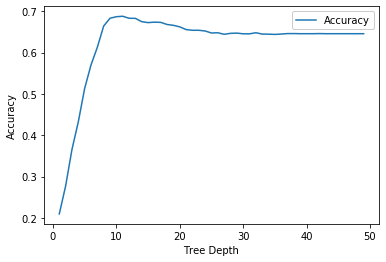

Maximum accuracy :  0.6877673224978614
Maximum depth of decision tree is :  11
              precision    recall  f1-score   support

           0       0.51      0.89      0.65       378
           1       0.69      0.72      0.71       368
           2       0.69      0.58      0.63       422
           3       0.74      0.62      0.68       390
           4       0.74      0.61      0.67       428
           5       0.82      0.76      0.79       394
           6       0.60      0.56      0.58       364
           7       0.77      0.81      0.79       375
           8       0.77      0.65      0.71       388

    accuracy                           0.69      3507
   macro avg       0.71      0.69      0.69      3507
weighted avg       0.71      0.69      0.69      3507

              precision    recall  f1-score   support

           0       0.40      0.45      0.43       254
           1       0.45      0.57      0.50      1000
           2       0.48      0.51      0.50       762

              precision    recall  f1-score   support

           0       0.23      0.44      0.30        39
           1       0.28      0.26      0.27        43
           2       0.22      0.08      0.12        24
           3       0.43      0.43      0.43        54
           4       0.37      0.28      0.32        67
           5       0.27      0.22      0.24        54
           6       0.39      0.60      0.48        25
           7       0.70      0.73      0.72       331
           8       0.69      0.65      0.67       209

    accuracy                           0.56       846
   macro avg       0.40      0.41      0.39       846
weighted avg       0.56      0.56      0.56       846

              precision    recall  f1-score   support

           0       0.46      0.44      0.45       113
           1       0.66      0.65      0.66       735
           2       0.59      0.69      0.63       439
           3       0.66      0.66      0.66       347
           4       0.66 

              precision    recall  f1-score   support

           0       0.29      0.40      0.34        25
           1       0.28      0.25      0.26        44
           2       0.43      0.37      0.40        76
           3       0.72      0.76      0.74       253
           4       0.26      0.24      0.25        33
           5       0.92      0.93      0.93       489
           6       0.32      0.29      0.30        86
           7       0.34      0.27      0.30        73
           8       0.20      0.25      0.22        44

    accuracy                           0.68      1123
   macro avg       0.42      0.42      0.42      1123
weighted avg       0.67      0.68      0.67      1123

              precision    recall  f1-score   support

           0       0.70      0.80      0.75       385
           1       0.48      0.57      0.52       305
           2       0.44      0.46      0.45       289
           3       0.25      0.33      0.28       104
           4       0.74 

              precision    recall  f1-score   support

           0       0.27      0.38      0.32         8
           1       0.37      0.35      0.36        31
           2       0.15      0.15      0.15        20
           3       0.82      0.73      0.77       153
           4       0.30      0.60      0.40         5
           5       0.35      0.43      0.38        58
           6       0.43      0.28      0.34        69
           7       0.94      0.94      0.94       664
           8       0.30      0.53      0.38        32

    accuracy                           0.78      1040
   macro avg       0.44      0.49      0.45      1040
weighted avg       0.80      0.78      0.79      1040

              precision    recall  f1-score   support

           0       0.59      0.69      0.63       323
           1       0.66      0.81      0.73       524
           2       0.67      0.69      0.68       400
           3       0.20      0.19      0.19        70
           4       0.75 

              precision    recall  f1-score   support

           0       0.27      0.32      0.29        31
           1       0.66      0.76      0.70       172
           2       0.28      0.36      0.32        50
           3       0.53      0.60      0.56       121
           4       0.66      0.59      0.62       257
           5       0.32      0.46      0.37       113
           6       0.37      0.30      0.33       108
           7       0.33      0.27      0.30        88
           8       0.42      0.29      0.34       167

    accuracy                           0.49      1107
   macro avg       0.43      0.44      0.43      1107
weighted avg       0.49      0.49      0.48      1107

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       400
           1       0.33      0.39      0.36       145
           2       0.80      0.84      0.82       767
           3       0.32      0.43      0.37       131
           4       0.38 

In [0]:
if __name__ == "__main__":
    # create a global list to record the unexpected states encountered by the Decision tree. These are states for which DT could not give an eligible move.
    global record_state
    record_state = []
    have_file = 1
    num_game = int(input("Please enter the number of games to be played : "))
    num_classifier = int(input('Please enter the number of datasets required to be created. Each dataset is a collection of states of a number of OXO games : '))
  
    print('Attempting to import the generated dataset ')
    ori_data = pd.read_csv('C:/Users/shery/output_1000_itrerations.csv')
    print('Finish importing the dataset')
    
    collection_classifier = build_dict_classifier(num_classifier, num_game, have_file, ori_data)
    #print('Length of dictionary : ', len(collection_classifier))
    #print('dictionary : ', collection_classifier)

    for i in range(0,len(collection_classifier),10):
        dt_10 = 0
        other_dt = 0
        draw = 0
        j=i
        for j in range(i, i+9): # execute from 0 until 8th index of every tenth position
            #Stage 6 to get the agent play with the past self data
            get_winner = UCTPlayGame_mod(collection_classifier[9+10*(i//10)], collection_classifier[j]) 
            #transfer 9 always and every value from 0 to 8
            #print(get_winner)
            if get_winner == 1:
                print('Decision Tree 10 wins')
                dt_10 += 1
            elif get_winner == 2:
                print('Decesion Tree',i+1,' wins')
                other_dt += 1
            else:
                print('No winning')
                draw += 1
        print("Win Result : \n 10thDecisionTree  : ", dt_10, " OtherDecisionTree : ", other_dt, " Draw : ", draw)

Please enter the number of games to be played : 100

Please enter the number of datasets required to be created. Each dataset is a collection of states of a number of OXO games : 100
Attempting to import the generated dataset 
Finish importing the dataset

Maximum accuracy :  0.6877673224978614
Maximum depth of decision tree is :  11
Decision Tree 10 wins
No winning
Decision Tree 10 wins
No winning
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
No winning
Win Result : 
 10thDecisionTree :  6  Other Decision Tree :  0  Draw :  3
No winning
Decision Tree 10 wins
No winning
No winning
No winning
Decision Tree 10 wins
No winning
No winning
No winning
Win Result : 
 10thDecisionTree :  2  Other Decision Tree :  0  Draw :  7
No winning
Decision Tree 10 wins
No winning
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
No winning
Decision Tree 10 wins
No winning
Win Result : 
 10thDecisionTree :  5  Other Decision Tree :  0  Draw :  4
No winning
No winning
No winning
Decision Tree 10 wins
Decesion Tree 31  wins
No winning
Decision Tree 10 wins
No winning
Decision Tree 10 wins
Win Result : 
 10thDecisionTree :  3  Other Decision Tree :  1  Draw :  5
No winning
No winning
Decision Tree 10 wins
No winning
No winning
Decision Tree 10 wins
No winning
No winning
Decision Tree 10 wins
Win Result : 
 10thDecisionTree :  3  Other Decision Tree :  0  Draw :  6
Decision Tree 10 wins
No winning
No winning
No winning
No winning
No winning
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
Win Result : 
 10thDecisionTree :  4  Other Decision Tree :  0  Draw :  5
No winning
No winning
Decesion Tree 61  wins
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
Win Result : 
 10thDecisionTree :  6  Other Decision Tree :  1  Draw :  2
No winning
Decision Tree 10 wins
No winning
No winning
Decision Tree 10 wins
Decision Tree 10 wins
No winning
Decision Tree 10 wins
No winning
Win Result : 
 10thDecisionTree :  4  Other Decision Tree :  0  Draw :  5
No winning
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
No winning
Decision Tree 10 wins
Win Result : 
 10thDecisionTree :  7  Other Decision Tree :  0  Draw :  2
Decesion Tree 91  wins
No winning
No winning
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
No winning
Decision Tree 10 wins
No winning
Win Result :  
 10thDecisionTree :  4  Other Decision Tree :  1  Draw :  4

```
# This is formatted as code
```



Please enter the number of games to be played : 10
Please enter the number of datasets required to be created. Each dataset is a collection of states of a number of OXO games : 100
Attempting to import the generated dataset 
Finish importing the dataset

Maximum accuracy :  0.6877673224978614
Maximum depth of decision tree is :  11
No winning
Decesion Tree 1  wins
No winning
No winning
Decision Tree 10 wins
Decesion Tree 1  wins
Decision Tree 10 wins
Decesion Tree 1  wins
Decision Tree 10 wins
Win Result : 
 10thDecisionTree  :  3  OtherDecisionTree :  3  Draw :  3
Decision Tree 10 wins
No winning
Decision Tree 10 wins
No winning
Decision Tree 10 wins
No winning
No winning
Decesion Tree 11  wins
No winning
Win Result : 
 10thDecisionTree  :  3  OtherDecisionTree :  1  Draw :  5
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
No winning
Decision Tree 10 wins
Decision Tree 10 wins
Decesion Tree 21  wins
Decision Tree 10 wins
Win Result : 
 10thDecisionTree  :  7  OtherDecisionTree :  1  Draw :  1
No winning
Decision Tree 10 wins
Decision Tree 10 wins
No winning
Decision Tree 10 wins
Decision Tree 10 wins
No winning
Decesion Tree 31  wins
Decision Tree 10 wins
Win Result : 
 10thDecisionTree  :  5  OtherDecisionTree :  1  Draw :  3
Decision Tree 10 wins
No winning
No winning
No winning
Decesion Tree 41  wins
No winning
No winning
No winning
No winning
Win Result : 
 10thDecisionTree  :  1  OtherDecisionTree :  1  Draw :  7
No winning
Decision Tree 10 wins
Decision Tree 10 wins
No winning
Decision Tree 10 wins
No winning
No winning
No winning
No winning
Win Result : 
 10thDecisionTree  :  3  OtherDecisionTree :  0  Draw :  6
Decision Tree 10 wins
Decision Tree 10 wins
No winning
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
Win Result : 
 10thDecisionTree  :  8  OtherDecisionTree :  0  Draw :  1
No winning
No winning
Decision Tree 10 wins
Decision Tree 10 wins
No winning
Decesion Tree 71  wins
Decision Tree 10 wins
Decision Tree 10 wins
No winning
Win Result : 
 10thDecisionTree  :  4  OtherDecisionTree :  1  Draw :  4
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
No winning
Decision Tree 10 wins
No winning
No winning
No winning
No winning
Win Result : 
 10thDecisionTree  :  4  OtherDecisionTree :  0  Draw :  5
No winning
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
No winning
No winning
Decision Tree 10 wins
Win Result : 
 10thDecisionTree  :  6  OtherDecisionTree :  0  Draw :  3

Please enter the number of games to be played : 10
Please enter the number of datasets required to be created. Each dataset is a collection of states of a number of OXO games : 50
Attempting to import the generated dataset 
Finish importing the dataset

Maximum accuracy :  0.6877673224978614
Maximum depth of decision tree is :  11
No winning
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
Decision Tree 10 wins
No winning
No winning
No winning
Win Result : 
 10thDecisionTree  :  5  OtherDecisionTree :  0  Draw :  4
No winning
Decesion Tree 11  wins
Decision Tree 10 wins
Decesion Tree 11  wins
No winning
Decision Tree 10 wins
Decision Tree 10 wins
No winning
No winning
Win Result : 
 10thDecisionTree  :  3  OtherDecisionTree :  2  Draw :  4
Decision Tree 10 wins
No winning
Decesion Tree 21  wins
No winning
No winning
No winning
No winning
No winning
Decision Tree 10 wins
Win Result : 
 10thDecisionTree  :  2  OtherDecisionTree :  1  Draw :  6
No winning
Decision Tree 10 wins
No winning
No winning
Decision Tree 10 wins
No winning
Decision Tree 10 wins
Decision Tree 10 wins
No winning
Win Result : 
 10thDecisionTree  :  4  OtherDecisionTree :  0  Draw :  5
Decision Tree 10 wins
Decision Tree 10 wins
No winning
No winning
No winning
Decision Tree 10 wins
Decision Tree 10 wins
No winning
Decision Tree 10 wins
Win Result : 
 10thDecisionTree  :  5  OtherDecisionTree :  0  Draw :  4